<a href="https://colab.research.google.com/github/dishitk/machine-learning/blob/master/Machine_Learning_Quiz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Quiz 3**

---


Task: Visit the link(https://www.kaggle.com/rohitgupta2120/multiple-regression-task) and infer about the summary of the model. Summary report can be found at the last cell of this notebook.

In [1]:
#Libraries used in the kernel

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graphs potting 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, classification_report
from statsmodels.api import OLS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
dataframe = pd.read_csv("/content/drive/My Drive/Placement_Data_Full_Class.csv", index_col="sl_no")
dataframe.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
data_reg = dataframe.copy()
data_class = dataframe.copy()

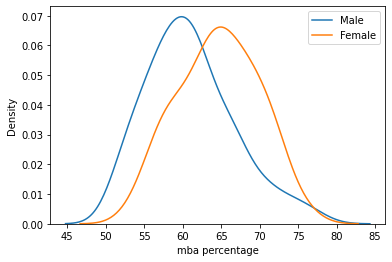

In [8]:
sns.kdeplot(dataframe.mba_p[ dataframe.gender=="M"])
sns.kdeplot(dataframe.mba_p[ dataframe.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("mba percentage")
plt.show()

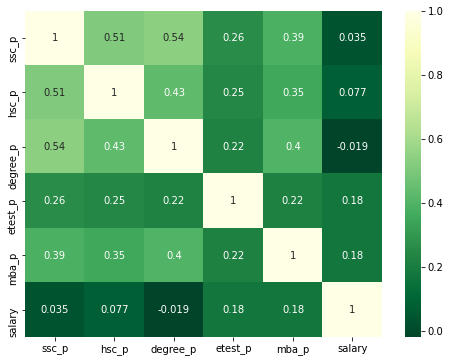

In [9]:
matrix = dataframe.corr()
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(matrix,annot=True,cmap="YlGn_r")

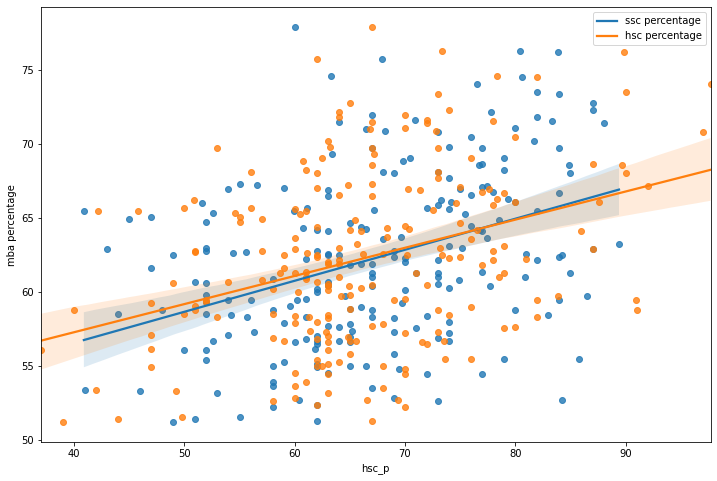

In [10]:
plt.figure(figsize=(12,8))
sns.regplot(x="ssc_p",y="mba_p",data=dataframe)
sns.regplot(x="hsc_p",y="mba_p",data=dataframe)
plt.legend(["ssc percentage", "hsc percentage"])
plt.ylabel("mba percentage")
plt.show()

In [11]:
X = data_class.iloc[:,[1,3]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [13]:
regressor = LinearRegression()

#train the model
regressor.fit(X_train, y_train)

#predict the test set(mba_p)
y_pred_m = regressor.predict(X_test)

In [14]:
print("R2 score: " + str(r2_score(y_test, y_pred_m)))

R2 score: 0.1749591688855493


In [15]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.13869167 0.13315395]]
[44.04616422]


In [16]:
summ=OLS(y_train,X_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              5048.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                   4.18e-152
Time:                        23:22:58   Log-Likelihood:                         -602.68
No. Observations:                 172   AIC:                                      1209.
Df Residuals:                     170   BIC:                                      1216.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5122      0.056      9.099      0.000       0.401       0.623
x2             0.4051      0.057      7.132      0.000       0.293       0.517
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.101
Skew:                           0.193   Prob(JB):                        0.577
Kurtosis:                       3.066   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
X = data_class.iloc[:,[1,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the dependent variable
y_pred_m = regressor.predict(X_test)

#from sklearn.metrics import r2_score, classification_report
print("R2 score: " + str(r2_score(y_test, y_pred_m)))
print("regression coeff: " + str(regressor.coef_))
print("regression intercept: " + str(regressor.intercept_))
print("mba_p = 0.12 x ssc_p + 0.22 x degree_p + 39.66")

R2 score: 0.2670526417462228
regression coeff: [[0.1237819  0.21517005]]
regression intercept: [39.65800695]
mba_p = 0.12 x ssc_p + 0.22 x degree_p + 39.66


In [18]:
X = data_class.iloc[:,[3,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_m = regressor.predict(X_test)

#from sklearn.metrics import r2_score, classification_report
print("R2 score:" + str(r2_score(y_test, y_pred_m)))
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = " + str(regressor.coef_[0][0]) + " x hsc_p + " + str(regressor.coef_[0][1]) + " x degree_p + " + str(regressor.intercept_[0]))

R2 score:0.17616396722600414
regression coeff:[[0.13171318 0.22510365]]
regression intercept:[38.56332438]
mba_p = 0.13171318061863166 x hsc_p + 0.22510364524995355 x degree_p + 38.56332437694495


In [19]:
X = data_class.iloc[:,[1,3,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1001)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
summ=OLS(y_train,X_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              4980.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                   1.34e-164
Time:                        23:25:57   Log-Likelihood:                         -569.34
No. Observations:                 172   AIC:                                      1145.
Df Residuals:                     169   BIC:                                      1154.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1817      0.063      2.892      0.004       0.058       0.306
x2             0.1940      0.054      3.583      0.000       0.087       0.301
x3             0.5572      0.066      8.455      0.000       0.427       0.687
==============================================================================
Omnibus:                        3.046   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                3.043
Skew:                           0.284   Prob(JB):                        0.218
Kurtosis:                       2.681   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X = data_class.iloc[:,[3,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1001)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred_m = regressor.predict(X_test)

In [23]:
summ=OLS(y_train,X_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              7155.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                   8.33e-165
Time:                        23:27:22   Log-Likelihood:                         -573.50
No. Observations:                 172   AIC:                                      1151.
Df Residuals:                     170   BIC:                                      1157.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2537      0.051      4.963      0.000       0.153       0.355
x2             0.6804      0.051     13.245      0.000       0.579       0.782
==============================================================================
Omnibus:                        4.630   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.431
Skew:                           0.212   Prob(JB):                        0.180
Kurtosis:                       2.453   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
print("R2 score:" + str(r2_score(y_test, y_pred_m)))

#model p values
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = " + str(regressor.coef_[0][0]) + " x hsc_p + " + str(regressor.coef_[0][1]) + " x degree_p + " + str(regressor.intercept_[0]))

R2 score:0.1883460640212925
regression coeff:[[0.14059098 0.2137894 ]]
regression intercept:[38.89461384]
mba_p = 0.14059098107062354 x hsc_p + 0.21378939519548953 x degree_p + 38.89461383778403


In [25]:
np.set_printoptions(precision=2)
dff = pd.DataFrame(list(zip(y_test, y_pred_m.round(2))),columns=("Target","Predicted"))
dff.head(8)

,Target,Predicted
0,[62.54],[62.23]
1,[70.81],[69.42]
2,[72.14],[61.62]
3,[69.7],[66.47]
4,[65.48],[57.92]
5,[61.31],[62.01]
6,[52.64],[59.02]
7,[57.65],[64.04]


Inference from model summary report:
1. Different predictor variables are taken in consideration for predicting a dependent variable. For example, ssc_p, hsc_p, degree_p
2. Heatmap helps to visualise correlation of different variables.
3. When ssc_p and hsc_p are taken as predictors, the model summary states p-value as 0.000 from which it can be inferred that they are important variables in predicting the mba_p.
4. Taking R2 score as comparision parameter different model equations having different predictors are compared.
5. R2 score can be understood as measure in statistics which depicts proportion of the variance for a dependent variable that is explained by predictor variable in regression model. We can see that R2 score is better when predictors are ssc_p and degree_p (0.267 or 26.7%) rather than hsc_p and degree_p (0.176 or 17.6%).
6. When model is summarised on predictors ssc_p,hsc_p and degree_p, it can be observed that p-value of ssc_p is 0.004. So it can inferred that ssc_p is not important variable so it is dropped and model is trained again.

Overall, this exercise makes us understand with different model comparision parameters to make feature engineering process efficient and accurate.